# 'Problem Statement: Concrete Strength Prediction'

 
**Goal:**
Objective 
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.
 
 **Resources Available**
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.
 
**Steps and Tasks:**<br><br>
•	<u>Exploratory Data Quality Report Reflecting the Following:</u>
1.	Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates(10 Marks)
2.	Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)
3.	Feature Engineering techniques(10 marks)
1.	Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.
2.	Get the data model ready and do a train test split.
3.	Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.
 
•	<u>Creating the Model and Tuning It:</u>
1.	Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)
2.	Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)
 
<u>Attribute Information:</u>
Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.
 
	Name	                       Data Type	Measurement	        Description
1.	Cement (cement)	               quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	   quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)	               quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)	               quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer(superplastic) quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)   quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	   quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	                   quantitative	Day (1~365)	        Input Variable
9.	<b>Concrete compressive(strength) quantitative	MPa	                Output Variable</b>


### 1) Deliverable 1 - Exploratory data quality report reflecting the following:
1.	Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates(10 Marks)
2.	Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)
3.	Feature Engineering techniques(10 marks)
1.	Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.
2.	Get the data model ready and do a train test split.
3.	Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.


In [76]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import pandas_profiling 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

#Model Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Dataset
con = pd.read_csv('concrete.csv')

In [4]:
#quick look at the data
con.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [6]:
#data types
con.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [8]:
con.describe().T

#most outputs are quite different. not considering dropping/imputing any values in this step

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [9]:
#see if any values missing - none
con.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [12]:
#check for null values - none
con.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [11]:
#get an idea about shape
con.shape

(1030, 9)

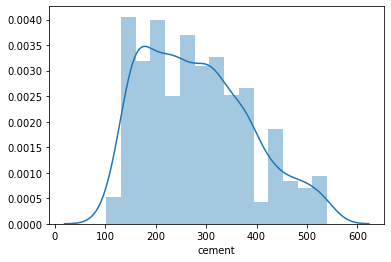

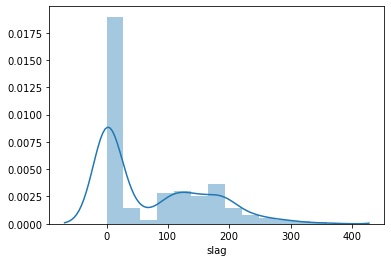

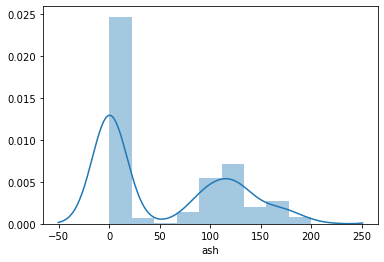

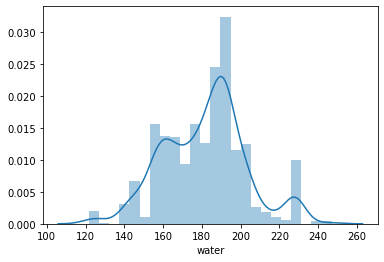

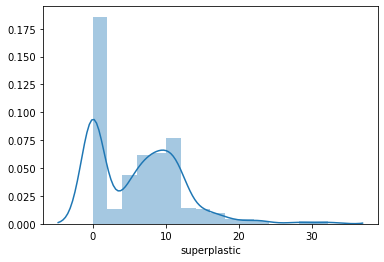

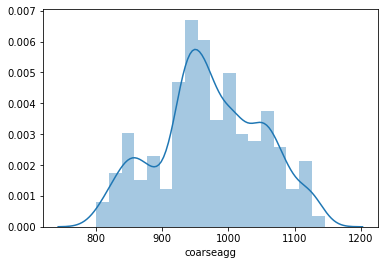

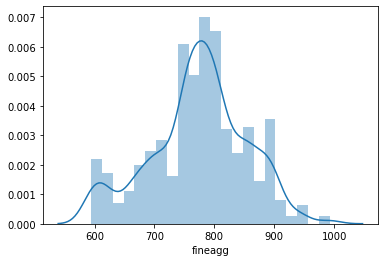

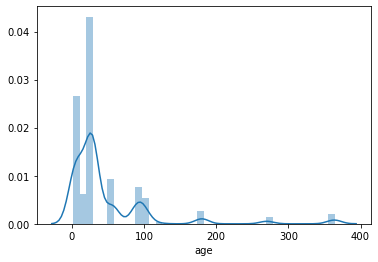

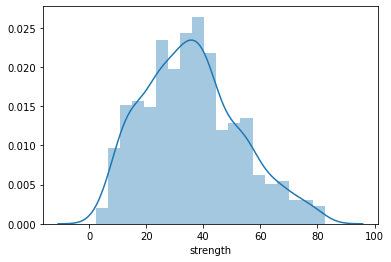

In [13]:
#look at at distributions - all numerical/continuous

colnames = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg','age','strength']

for colname in colnames:
    sns.distplot(con[colname])
    plt.show()
    
    
#output: positively skewed for: slag, ash, superplastic, age variables

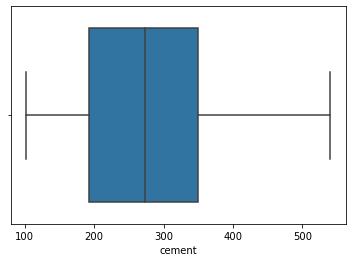

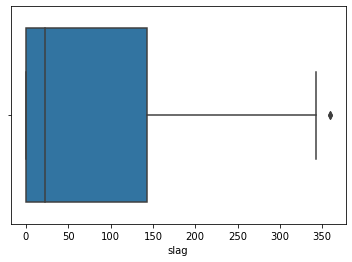

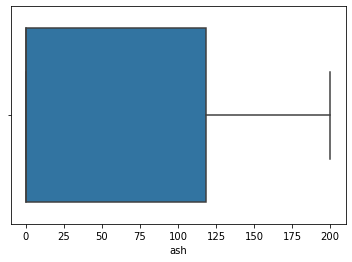

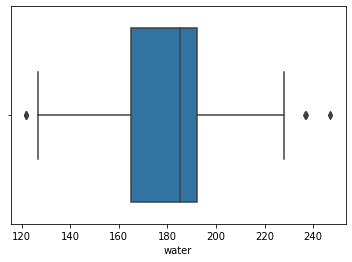

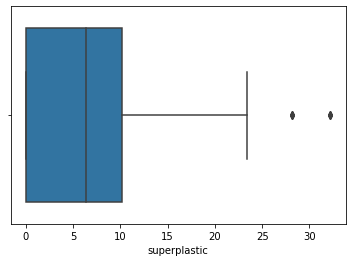

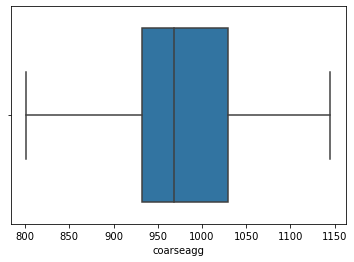

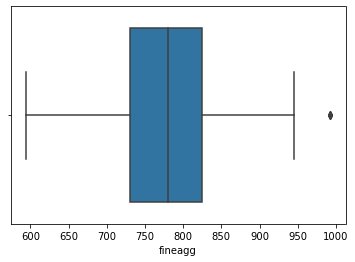

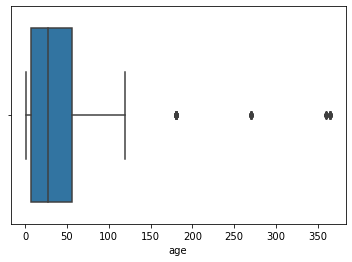

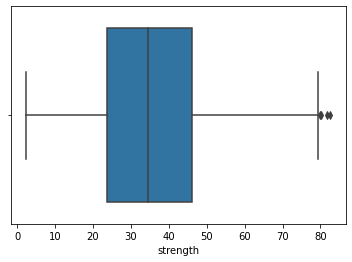

In [14]:
#boxplots
sec_colnames = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg','age','strength']

for colname in sec_colnames:
    sns.boxplot(con[colname])
    plt.show()
    
#output: there are some outliers but not many. age has the most so I will remove as there 

In [23]:
con2 = con

mean = con2.loc[con2['age']<100, 'age'].mean()
con2["age"] = np.where(con2["age"] >100, mean,con2['age'])

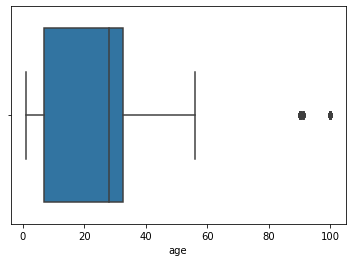

In [24]:
#look at new age boxplot 
sns.boxplot(con2['age'])

#output: looks better. still some outliers but not as extreme

In [25]:
#view number of unique values per variable
con2.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              11
strength        845
dtype: int64

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [26]:
#see if there is a relevant correlation value
cor=con2.corr()
cor

#output: no obvious correlations so we will keep all fields

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,-0.032402,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.026468,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,0.059057,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,-0.037083,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,0.064730,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,0.010990,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,0.040000,-0.167241
age,-0.032402,-0.026468,0.059057,-0.037083,0.064730,0.010990,0.040000,1.000000,0.510099
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.510099,1.000000


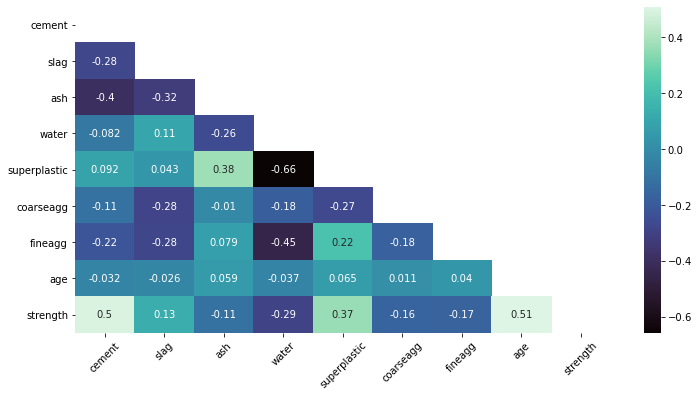

In [31]:
#further look at correlation with heatmap
plt.subplots(figsize=(12, 6))
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data=cor, cmap='mako', annot=True, mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#output greater than 50%: 
# - negative correlation between superplastic + water
# - positive correlation between age + strength
# - positive correlation between cement + strength

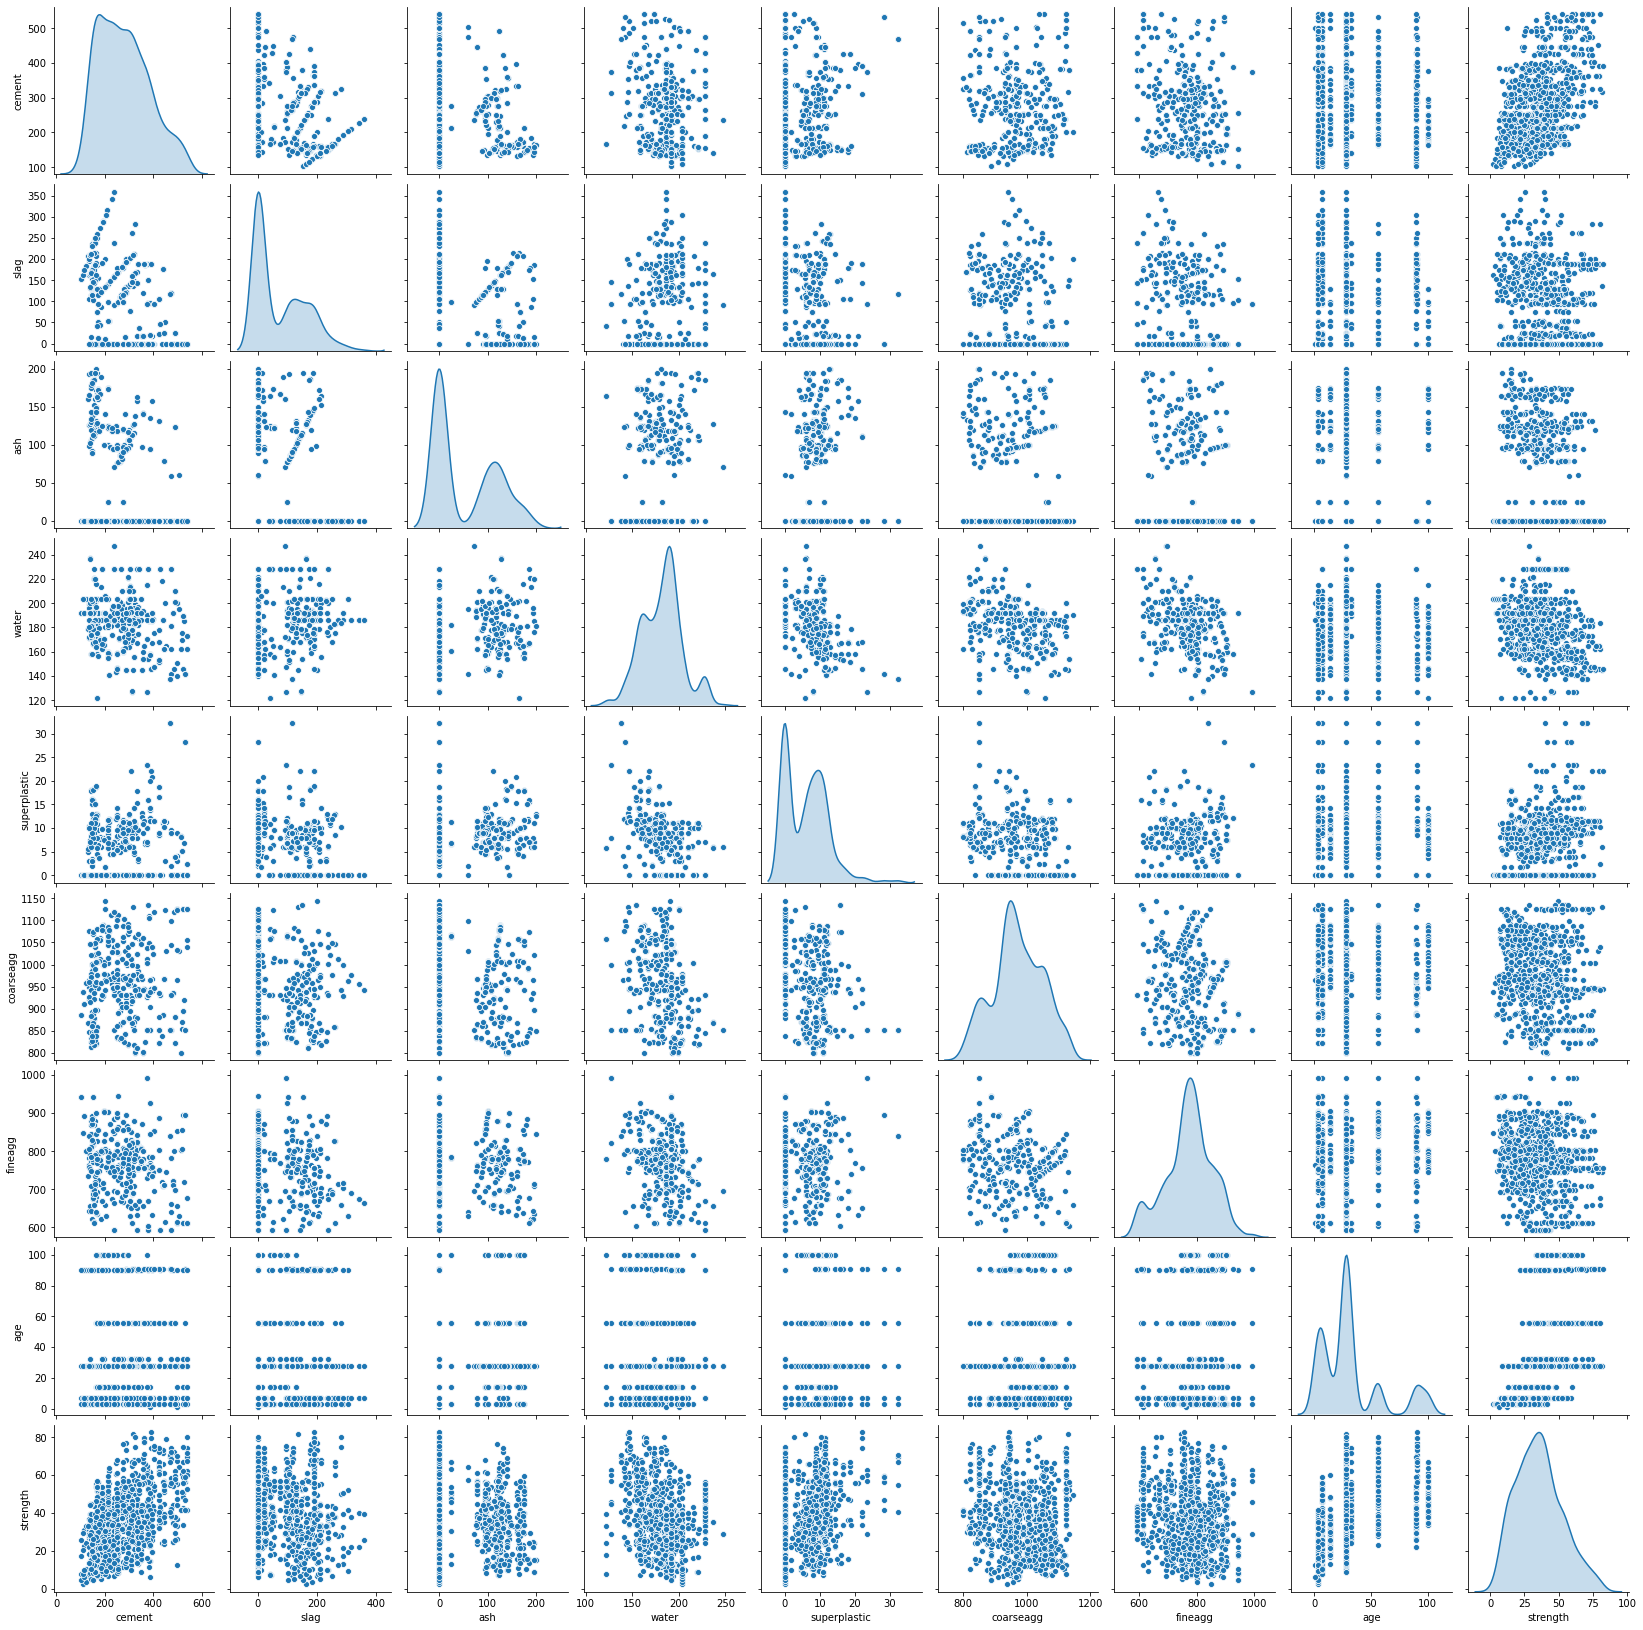

In [27]:
#use a pairplot to graphically view relationships

sns.pairplot(con2,diag_kind='kde')
plt.show()

#output: same conclusions as the correlation heatmap above. in addition, courseagg and fineagg seem to be scattered
#all over the grid--will remove these two variables in the following steps

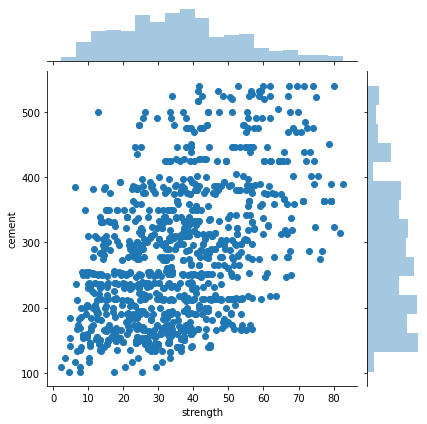

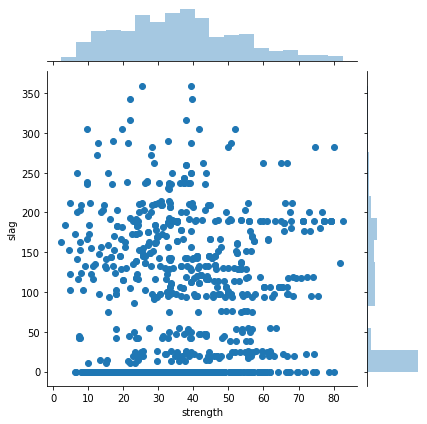

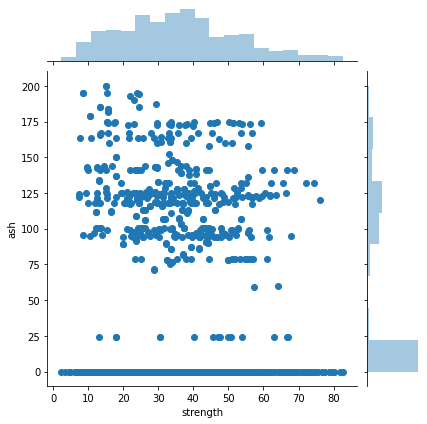

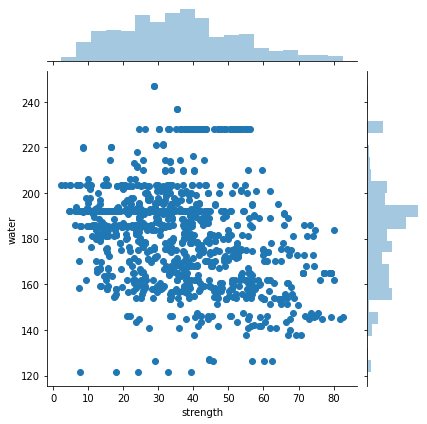

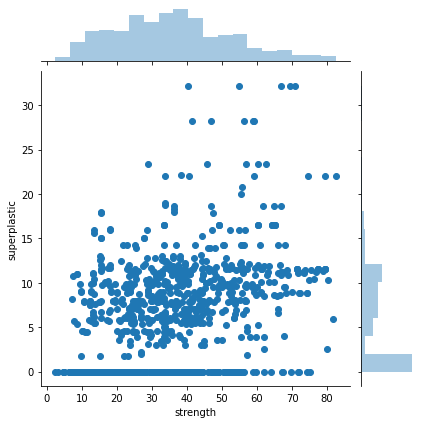

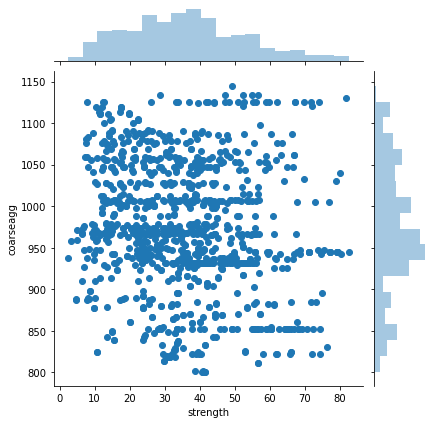

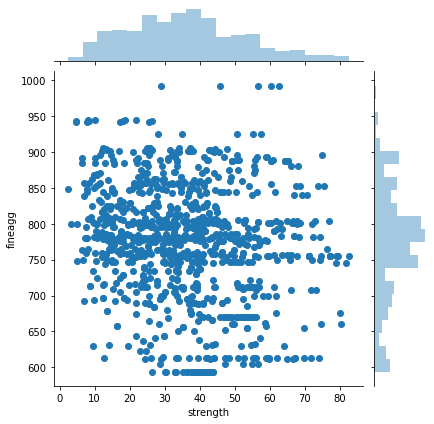

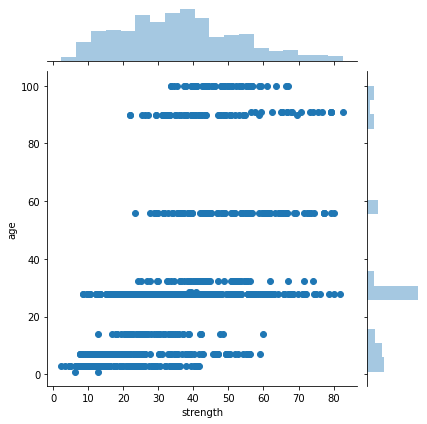

In [29]:
#boxplots don't make sense for all-continuous-variables data set. chose jointplot as it will display scatterplot as
#well as histograms and not very cpu intensive

for i in ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']:
    sns.jointplot(x='strength',y=i,data=con2)
    plt.show()
    
#output: similar idea to pairplot and same conclusion as pairplot in terms of Target/Independent variables. the only
#possible relationship observed via plots is between strength and cement

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

No feature extraction possible from current data set since we do not have F and A as per formula below

**"The compressive stress formula is:    <br>
CS = F ÷ A, where CS is the compressive strength, F is the force or load at <br>
point of failure and A is the initial cross-sectional surface area."**

In [33]:
#drop coarseagg and fineagg
con3 = con2.drop(columns=['coarseagg', 'fineagg'])

In [34]:
con3.head(10)
#look at table after dropping columns

,cement,slag,ash,water,superplastic,age,strength
0,141.3,212.0,0.0,203.5,0.0,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,28.0,18.29
5,255.0,0.0,0.0,192.0,0.0,90.0,21.86
6,166.8,250.2,0.0,203.5,0.0,7.0,15.75
7,251.4,0.0,118.3,188.5,6.4,56.0,36.64
8,296.0,0.0,0.0,192.0,0.0,28.0,21.65
9,155.0,184.0,143.0,194.0,9.0,28.0,28.99


In [37]:
# Seperating the target from independent variables
X = con3.drop(columns= ['strength'], axis=1)  
y = con3[['strength']]

In [41]:
# Splitting the data for training and testing (70/30)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 0)

In [82]:
X_train.shape,X_test.shape

((721, 6), (309, 6))

In [83]:
y_train.shape,y_test.shape

((721, 1), (309, 1))

In [57]:
X_train.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
age             float64
dtype: object

In [123]:
#set up list for outputting tables later:
model_type= []
train_score = []
test_score = []
cv_score = []

In [124]:
numfolds = 5
rs = 0

In [125]:
# Linear Regression/base

from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)

LinearRegression()

In [126]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lr_kfold = KFold(n_splits=numfolds, random_state=rs)
lrm = LinearRegression()
lr_results = cross_val_score(lrm,X,y, cv=lr_kfold).mean()
print(f'Cross Validation for Linear Regression: {lr_results}')

Cross Validation for Linear Regression: 0.7082562067432836


In [127]:
y_predict = lrmodel.predict(X_test)

print("Trainig Accuracy",lrmodel.score(X_train,y_train))  
print("Testing Accuracy",lrmodel.score(X_test, y_test))

Trainig Accuracy 0.7237764667702795
Testing Accuracy 0.6980121332794403


In [128]:
#append to data table
model_type.append('Linear_Regression')
train_score.append(lrmodel.score(X_train, y_train))
test_score.append(lrmodel.score(X_test, y_test))
cv_score.append(lr_results)

In [102]:
#ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)lr_kfold = KFold(n_splits=numfolds, random_state=rs)
lrm = LinearRegression()
lr_results = cross_val_score(lrm,X,y, cv=lr_kfold).mean()
print(f'Cross Validation for Linear Regression: {lr_results}')

Ridge(alpha=0.3)

In [131]:
r_kfold = KFold(n_splits=numfolds, random_state=rs)
rm = ridge
r_results = cross_val_score(rm,X,y, cv=r_kfold).mean()
print(f'Cross Validation for Ridge Regression: {r_results}')

Cross Validation for Ridge Regression: 0.7082562230351304


In [132]:
print("Training Accuracy",ridge.score(X_train, y_train))
print("Testing Accuracy",ridge.score(X_test, y_test))

Training Accuracy 0.7237764667686997
Testing Accuracy 0.6980122227729615


In [133]:
#append to data table
model_type.append('Ridge_Regression')
train_score.append(ridge.score(X_train, y_train))
test_score.append(ridge.score(X_test, y_test))
cv_score.append(r_results)

In [134]:
#lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.2)
lasso.fit(X_train,y_train)

Lasso(alpha=0.2)

In [135]:
l_kfold = KFold(n_splits=numfolds, random_state=rs)
las = lasso
l_results = cross_val_score(las,X,y, cv=l_kfold).mean()
print(f'Cross Validation for Lasso Regression: {l_results}')

Cross Validation for Lasso Regression: 0.7082609701813551


In [136]:
print("Training Accuracy",lasso.score(X_train, y_train))
print("Testing Accuracy",lasso.score(X_test, y_test))

Training Accuracy 0.7237706939651412
Testing Accuracy 0.6981647255069607


In [137]:
#append to data table
model_type.append('Lasso_Regression')
train_score.append(ridge.score(X_train, y_train))
test_score.append(ridge.score(X_test, y_test))
cv_score.append(l_results)

In [146]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [147]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [148]:
dt_kfold = KFold(n_splits=numfolds, random_state=rs)
dtm = dt
dt_results = cross_val_score(dtm,X,y, cv=dt_kfold).mean()
print(f'Cross Validation for Decision Tree Regression: {dt_results}')

Cross Validation for Decision Tree Regression: 0.8518635322169883


In [149]:
print("Trainig Accuracy:",dt.score(X_train,y_train))  
print("Testing Accuracy:",dt.score(X_test, y_test))

Trainig Accuracy: 0.9942026592186586
Testing Accuracy: 0.8488351354399906


In [150]:
#append to data table
model_type.append('Decision Tree Regression')
train_score.append(dt.score(X_train, y_train))
test_score.append(dt.score(X_test, y_test))
cv_score.append(dt_results)

In [154]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [155]:
# Bagging
bmodel = BaggingRegressor(random_state=rs,n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True)

bmodel.fit(X_train, y_train)

BaggingRegressor(max_samples=0.7, n_estimators=100, oob_score=True,
                 random_state=0)

In [156]:
bag_kfold = KFold(n_splits=numfolds, random_state=rs)
bag = bmodel
bag_results = cross_val_score(bag,X,y, cv=bag_kfold).mean()
print(f'Cross Validation for Bagging: {bag_results}')

Cross Validation for Bagging: 0.9022833347128986


In [157]:
model_type.append('Bagging')
train_score.append(bmodel.score(X_train, y_train))
test_score.append(bmodel.score(X_test, y_test))
cv_score.append(bag_results)

In [158]:
# AdaBoost
adamodel = AdaBoostRegressor(n_estimators= 100, learning_rate=0.1,random_state=rs)
adamodel.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=0)

In [159]:
ada_kfold = KFold(n_splits=numfolds, random_state=rs)
ad = adamodel
ada_results = cross_val_score(ad,X,y, cv=ada_kfold).mean()
print(f'Cross Validation for AdaBoosting: {ada_results}')

Cross Validation for AdaBoosting: 0.7347334062787688


In [160]:
model_type.append('AdaBoost')
train_score.append(adamodel.score(X_train, y_train))
test_score.append(adamodel.score(X_test, y_test))
cv_score.append(ada_results)

In [162]:
# Gradient Boosting

gbmodel = GradientBoostingRegressor(random_state=rs, n_estimators=200,)
gbmodel.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=0)

In [163]:
gbkfold = KFold(n_splits=numfolds, random_state=rs)
gb = gbmodel
gb_results = cross_val_score(gb,X,y, cv=gbkfold).mean()
print(f'Cross Validation for Gradient Boosting: {gb_results}')

Cross Validation for Gradient Boosting: 0.9152578838747489


In [164]:
model_type.append('Gradient Boosting')
train_score.append(gbmodel.score(X_train, y_train))
test_score.append(gbmodel.score(X_test, y_test))
cv_score.append(gb_results)

In [167]:
p1results = pd.DataFrame()
p1results['Model'] = model_type
p1results['Training Score'] = train_score
p1results['Testing Score'] = test_score
p1results['Crost Validation Score'] = cv_score
p1results = p1results.set_index('Model')
p1results

,Training Score,Testing Score,Crost Validation Score
Model,,,
Linear_Regression,0.723776,0.698012,0.708256
Ridge_Regression,0.723776,0.698012,0.708256
Lasso_Regression,0.723776,0.698012,0.708261
Decision Tree Regression,0.994203,0.848835,0.851864
Bagging,0.971457,0.891803,0.902283
AdaBoost,0.775144,0.717818,0.734733
Gradient Boosting,0.964414,0.905765,0.915258


Linear, Ridge and Lasso were very close to the same across the board for train/test/cv scoring so they don't seem too useful.

Decision Tree Regression Bagging was very overfit versus the tesing model but Bagging CV score was quite high.

AdaBoost was somewhat aligned although still a bit overfit.

Gradient Boosting seems to be doing the best in Train vs. Test data AND in the Cross Validation Score.


In [171]:
#hypertuning for:
#gradient boosting (has best scores)
#bagging (second best scores)
#did not choose Decision Tree Regression as the training model was very overfit to the test data (arguably) vs. Bagging method

#GridSearchCV: Gradient Boosting

from sklearn.model_selection import GridSearchCV

parameters = {
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}

In [172]:
gs_gb = GridSearchCV(GradientBoostingRegressor(), parameters, cv = 5, verbose = 2, n_jobs= 4)
gs_gb.fit(X, y)

gs_gb.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   30.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   37.3s finished


{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'n_estimators': 100}

In [174]:
#find and store tuned cross validation score for gradient boosting

gradb_tuned = GradientBoostingRegressor(
 max_depth= 20,
 max_features= 'sqrt',
 min_samples_leaf= 8,
 n_estimators= 100)


gb_tuned_score = cross_val_score(gradb_tuned, X, y, cv = 5).mean()
gb_tuned_score

0.9316026154557108

In [175]:
model_type.append('Tuned Gradient Boosting - GridSearch')
cv_score.append(gb_tuned_score)

In [226]:
parameters_bag = {"max_samples": [0.5, 1.0, 1.5,2.0,2.5,3.0],
                    "max_features": [0.5, 1.0,1.5,2.0,2.5,3.0],
                    "bootstrap": [True, False],
                    "bootstrap_features": [True, False]}

In [227]:
gs_bag = GridSearchCV(BaggingRegressor(), parameters_bag, cv = 5, verbose = 2, n_jobs= 4)
gs_bag.fit(X, y)

gs_bag.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:    4.7s finished


{'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0}

In [228]:
#find and store tuned cross validation score for bagging

bag_tuned = BaggingRegressor(
 bootstrap = True,
 bootstrap_features = False,
 max_features = 1.0,
 max_samples = 1.0)

bag_tuned_score = cross_val_score(bag_tuned, X, y, cv = 5).mean()
bag_tuned_score

0.8991478555722752

In [229]:
model_type.append('Tuned Bagging - GridSearch')
cv_score.append(bag_tuned_score)

In [231]:
p2results = pd.DataFrame()
p2results['Technique'] = model_type
p2results['Crost Validation Score'] = cv_score
p2results = p2results.set_index('Technique')
p2results

,Crost Validation Score
Technique,
Linear_Regression,0.708256
Ridge_Regression,0.708256
Lasso_Regression,0.708261
Decision Tree Regression,0.851864
Bagging,0.902283
AdaBoost,0.734733
Gradient Boosting,0.915258
Tuned Gradient Boosting - GridSearch,0.931603
Tuned Bagging - GridSearch,0.899148


## Observation: From the Cross Validation score, I would recommend using a tuned Gradient Boosting model to predict concrete strength. Other techniques that would satisfy the goal of 'above 85%'  for this project are: 1) non-tuned Gradient Boosting, 2) Bagging, 3) tuned Bagging and 4) Decision Tree Regression.  